# Flights Data Exploration
## by Abdullah Al Ajjan

## Preliminary Wrangling

This document explores a dataset containing the flights in the United States for April 2019 and April 2020.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Start with loading the data sets of the flights in april 2019 and april 2020

In [2]:
# load the two datasets
df19 = pd.read_csv('2019.csv')
df20 = pd.read_csv('2020.csv')

In [3]:
# In order to see all the columns
pd.set_option('display.max_columns', 500)

In [4]:
# find the number of rows and columns
print(df19.shape)
print(df20.shape)

(612023, 24)
(313382, 24)


In [5]:
# Display April 2019 data
df19.head()

,YEAR,MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_NM,DEST,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 23
0,2019,4,5,2019-04-05,NK,LGA,New York,FLL,Florida,2014,2025.0,11.0,2322,2326.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,4,6,2019-04-06,NK,LGA,New York,FLL,Florida,2014,2003.0,0.0,2322,2256.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,4,7,2019-04-07,NK,LGA,New York,FLL,Florida,2014,2006.0,0.0,2322,2308.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,4,1,2019-04-08,NK,LGA,New York,FLL,Florida,2014,2024.0,10.0,2322,9.0,47.0,1.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,NaN
4,2019,4,2,2019-04-09,NK,LGA,New York,FLL,Florida,2014,2120.0,66.0,2322,47.0,85.0,1.0,0.0,0.0,0.0,0.0,85.0,0.0,0.0,NaN


In [6]:
# Display April 2020 data
df20.head()

,YEAR,MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_NM,DEST,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 23
0,2020,4,3,2020-04-22,OH,CLT,North Carolina,GNV,Florida,2230,2224.0,0.0,3,2351.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,4,4,2020-04-23,OH,CLT,North Carolina,GNV,Florida,2230,2223.0,0.0,3,2353.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,4,5,2020-04-24,OH,CLT,North Carolina,GNV,Florida,2230,2224.0,0.0,3,2348.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,4,6,2020-04-25,OH,CLT,North Carolina,GNV,Florida,2230,2325.0,55.0,3,50.0,47.0,1.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,NaN
4,2020,4,7,2020-04-26,OH,CLT,North Carolina,GNV,Florida,2230,2229.0,0.0,3,2353.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning the data set by removing all the rows that do not represent any issue within the flight (Delay, cancellation, deviation)

In [7]:
# filling all Nan in the Delay, cancelled, and diverted column with 0
df19["ARR_DEL15"] = df19["ARR_DEL15"].fillna(0)
df19["CANCELLED"] = df19["CANCELLED"].fillna(0)
df19["DIVERTED"] = df19["DIVERTED"].fillna(0)
df20["ARR_DEL15"] = df20["ARR_DEL15"].fillna(0)
df20["CANCELLED"] = df20["CANCELLED"].fillna(0)
df20["DIVERTED"] = df20["DIVERTED"].fillna(0)

In [8]:
# creating a new column to keep only the flights that encountered an issue
df19['TO_STUDY'] = df19["ARR_DEL15"] + df19["CANCELLED"] + df19["DIVERTED"]
df20['TO_STUDY'] = df20["ARR_DEL15"] + df20["CANCELLED"] + df20["DIVERTED"]

In [9]:
# keeping only the flights that encountered an issue
df19 = df19[df19['TO_STUDY']!=0]
df20 = df20[df20['TO_STUDY']!=0]

In [10]:
# displaying the new shape of the data sets
print(df19.shape)
print(df20.shape)

(124521, 25)
(139414, 25)


Removing unneeded columns

In [11]:
# no need for the below columns
df19.drop('TO_STUDY', axis = 1 , inplace=True)
df19.drop('Unnamed: 23', axis = 1 , inplace=True)
df20.drop('TO_STUDY', axis = 1 , inplace=True)
df20.drop('Unnamed: 23', axis = 1 , inplace=True)

In [12]:
# Adding the 2 data sets to each other forming a new dataframe
df = pd.concat([df19, df20],ignore_index=True)

In [13]:
# Displaying the shape and the types of the columns of the new dataframe
print(df.shape)
print(df.dtypes)

(263935, 23)
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK              int64
FL_DATE                 object
OP_UNIQUE_CARRIER       object
ORIGIN                  object
ORIGIN_STATE_NM         object
DEST                    object
DEST_STATE_NM           object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY_NEW          float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
CANCELLED              float64
DIVERTED               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtype: object


Fixing the type of columns, combining the three columns into one which will show what issue did the flight have.

In [14]:
# changing the date from string format to a date format
df.FL_DATE = pd.to_datetime(df.FL_DATE)

In [15]:
# change the name of the column to a new one that looks like the other columns
df.rename(columns={"ARR_DEL15": "DELAYED"}, inplace=True)

In [16]:
# joining the three columns (DELAYED, CANCELLED, DIVERTED) into one column (ISSUE_TYPE)
df = pd.melt(df, id_vars=['YEAR', 'MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER','ORIGIN', 'ORIGIN_STATE_NM', 'DEST', 'DEST_STATE_NM', 'CRS_DEP_TIME','DEP_TIME','DEP_DELAY_NEW','CRS_ARR_TIME' , 'ARR_TIME' , 'ARR_DELAY_NEW' , 'CARRIER_DELAY' , 'WEATHER_DELAY', 'NAS_DELAY' , 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
                           var_name='ISSUE_TYPE')

In [17]:
# Removing excess rows
df = df[df['value']!=0]

In [18]:
# no need for the value column anymore
df.drop('value', axis = 1 , inplace=True)

In [19]:
# Displaying the shape and a sample of the dataframe
print(df.shape)
print(df.sample(5))

(263935, 21)
        YEAR  MONTH  DAY_OF_WEEK    FL_DATE OP_UNIQUE_CARRIER ORIGIN  \
515439  2020      4            2 2020-04-14                WN    ELP   
337577  2019      4            6 2019-04-13                AA    DFW   
101126  2019      4            1 2019-04-01                YV    SBA   
332106  2019      4            3 2019-04-24                MQ    SPS   
51711   2019      4            7 2019-04-21                YX    MIA   

       ORIGIN_STATE_NM DEST DEST_STATE_NM  CRS_DEP_TIME  DEP_TIME  \
515439           Texas  DAL         Texas          1810       NaN   
337577           Texas  ATL       Georgia          1425       NaN   
101126      California  PHX       Arizona          1915    2024.0   
332106           Texas  DFW         Texas           656       NaN   
51711          Florida  RIC      Virginia          1511    1528.0   

        DEP_DELAY_NEW  CRS_ARR_TIME  ARR_TIME  ARR_DELAY_NEW  CARRIER_DELAY  \
515439            NaN          2045       NaN            NaN

In [20]:
# displaying some properties of the dataframe
display(df.describe())

,YEAR,MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,263935.000000,263935.0,263935.000000,263935.000000,119799.000000,119792.000000,263935.000000,119143.000000,117556.000000,117556.000000,117556.000000,117556.000000,117556.000000,117556.000000
mean,2019.528213,4.0,3.943653,1374.811810,1505.742385,66.670203,1529.960316,1534.239519,70.052724,23.418898,3.836384,15.710793,0.090212,26.996436
std,0.499204,0.0,2.013923,476.621107,503.070647,92.177005,519.154674,635.188697,89.832553,67.729059,32.272181,39.388896,3.673491,52.867287
min,2019.000000,4.0,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,4.0,2.000000,955.000000,1130.000000,19.000000,1136.000000,1155.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.000000,4.0,4.000000,1407.000000,1549.000000,42.000000,1600.000000,1655.000000,42.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,2020.000000,4.0,6.000000,1755.000000,1921.000000,83.000000,1939.000000,2034.000000,82.000000,21.000000,0.000000,18.000000,0.000000,33.000000
max,2020.000000,4.0,7.000000,2359.000000,2400.000000,2079.000000,2359.000000,2400.000000,2075.000000,1768.000000,1410.000000,1418.000000,1048.000000,2014.000000


## Univariate Exploration


##### Finding how the time of month effects the flights.


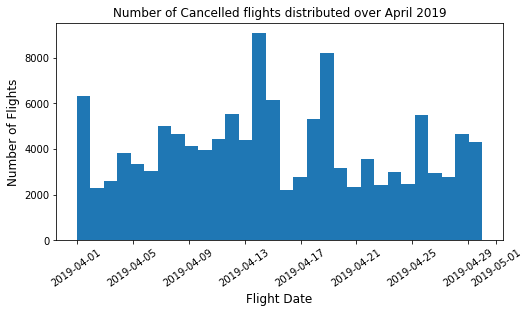

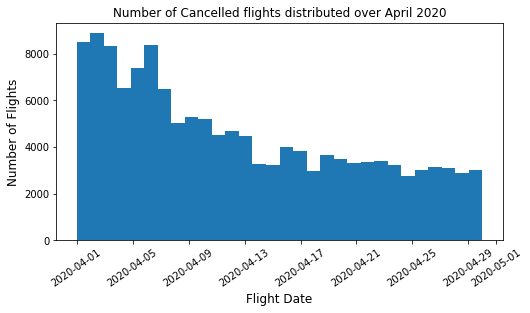

In [21]:
# Plotting 2 Histograms showing the relation between the day of month and the number of flight issues in both 2019 and 2020

plt.figure(figsize=[8, 4])
plt.hist(data = df[df.YEAR==2019], x = 'FL_DATE', bins=30)
plt.xlabel('Flight Date', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.title('Number of Cancelled flights distributed over April 2019')
plt.xticks(rotation=35)
plt.show()

plt.figure(figsize=[8, 4])
plt.hist(data = df[df.YEAR==2020], x = 'FL_DATE', bins=30)
plt.xlabel('Flight Date', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.title('Number of Cancelled flights distributed over April 2020')
plt.xticks(rotation=35)
plt.show();

The flights with issued were uniformly spread with some peaks in 2019 yet they were decreasing in 2020, this decrease could be due to covid 19 restrictions.


##### Delay time

/Users/abdullah/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/abdullah/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


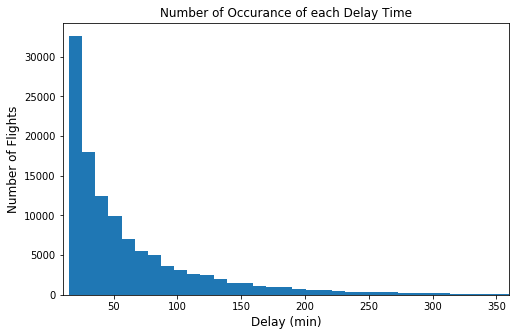

In [22]:
# plotting a histogram showing how often each delay time occurs
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'ARR_DELAY_NEW', bins=200)
plt.xlim(10, 360)
plt.xlabel('Delay (min)', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.title ('Number of Occurance of each Delay Time')
plt.show();

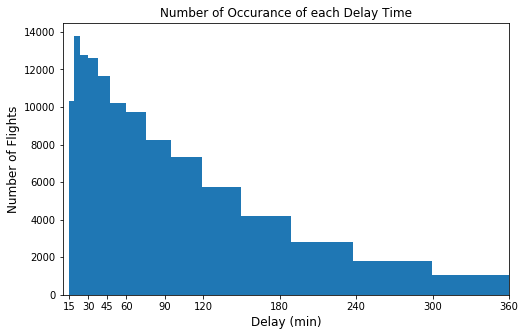

In [23]:
#there's a long tail in the distribution, so let's put it on a log scale instead
bins = 10 ** np.arange(np.log10(15), np.log10(360)+0.1, 0.1)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'ARR_DELAY_NEW', bins=bins)
plt.xlim(10, 360)
plt.xlabel('Delay (min)', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.title ('Number of Occurance of each Delay Time')
tick_locs=[15,30,45,60,90,120,180,240,300,360]
plt.xticks(tick_locs)
plt.show();

for the above the graph there are a few amount of outliers therefor a limit was set to up to 6 hours which is higher than the 3rd quartile. Moreover, the bins were taken by log to make the figure more visable.
This figure shows that most of the delays were between 15 and 60 mins, some of them were up to and hour and a half, 2hours and even more.

##### Does the destination airport affects whether a flight gets diverted or not?

In [24]:
# studying only the diverted flights
df_diverted = df[df['ISSUE_TYPE']== 'DIVERTED']

In [25]:
# finding where every diverted flight was heading
DESTDIV= df_diverted.DEST.value_counts(ascending = False).head(10)

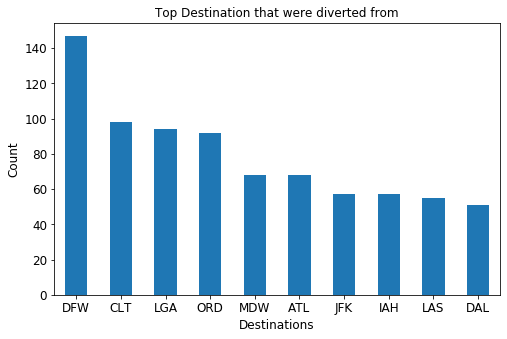

In [26]:
# Creating a bar chart showing how many Divertion happened to every destination
DESTDIV.plot(kind='bar', figsize=(8,5), label= 'count' ,rot=0, fontsize=12)
plt.title('Top Destination that were diverted from')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Destinations', fontsize=12);

From the above Graph it's noticable that flights heading to Dallas, Chicago, Charlotte, Atlanta, Denver, Pheonix, Las Vegas, Queens, Los Angeles, and Houston are most likely to be diverted. This might be due to the high number of flights that these Airports receive.

##### Influence of Pandemic

In [27]:
# Showing only the cancelled flights
CANCELLED_FLIGHTS = df[df['ISSUE_TYPE']=='CANCELLED'].YEAR.value_counts()

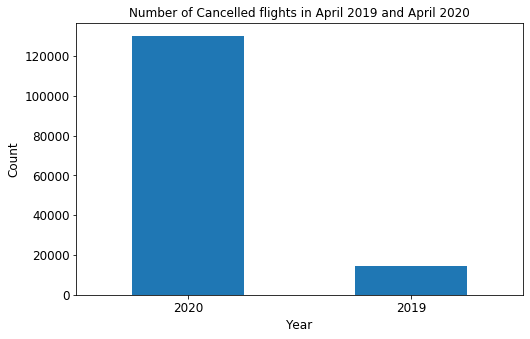

In [28]:
# Creating a bar chart to show the difference between the number of cancelled flights in April 2019 and April 2020
CANCELLED_FLIGHTS.plot(kind='bar', figsize=(8,5), label= 'count' ,rot=0, fontsize=12)

plt.title('Number of Cancelled flights in April 2019 and April 2020')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12);


We Can see that the number of cancelled flights in 2020 is much higher than that in 2019 this is mainly due to the lockdown all over the United States.

#### What are the delays due to?

In [29]:
# Showing only the Delayed flights
df_delayed = df[df['ISSUE_TYPE']== 'DELAYED']

In [30]:
# keeping only the 5 columns that represent the reason of the delay
df_delayed = df_delayed[['SECURITY_DELAY','LATE_AIRCRAFT_DELAY','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY']]

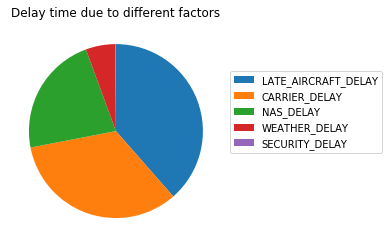

In [31]:
# plotting a pie chart that represents the reasons behind the delay
plt.pie(df_delayed.sum().sort_values(ascending = False), startangle = 90,
        counterclock = False)
plt.legend(labels = df_delayed.sum().sort_values(ascending = False).index, bbox_to_anchor=(1, 0, 0.5, 0.8))
plt.title('Delay time due to different factors');

Flights are delayed the most from late aircrafts, carrier comes second in delay time, National Airspace System
comes third right before weather and security delays.

## Bivariate Exploration

#### How do the departure delay time and the arrival delay time correlate?

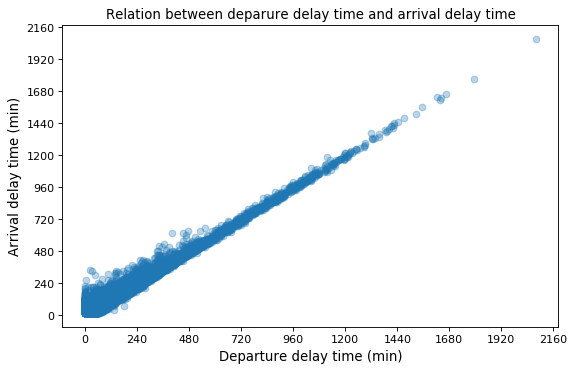

In [32]:
# Plotting a Scatter plot showing the relavance between departure delay time and arrival delay time
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(data = df, x = 'DEP_DELAY_NEW', y = 'ARR_DELAY_NEW', alpha=0.3)
plt.title('Relation between deparure delay time and arrival delay time')
plt.ylabel('Arrival delay time (min)', fontsize=12)
plt.xlabel('Departure delay time (min)', fontsize=12)
plt.xticks(np.arange(0,df.DEP_DELAY_NEW.max()+240,240))
plt.yticks(np.arange(0,df.ARR_DELAY_NEW.max()+240,240));

We can say that there is a high positive correlation between the arrival delay time and the departure delay time. This shows that most of the delays happen before the airplane takes off.

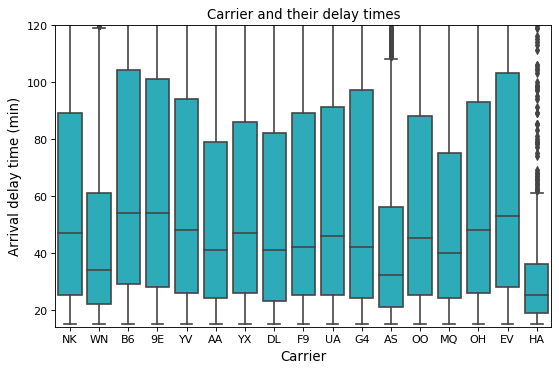

In [33]:
# Creating a box plot to find which carriers are responsible for the highest delay times
base_color = sb.color_palette()[9]
plt.figure(figsize=(8, 5), dpi=80)
sb.boxplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'ARR_DELAY_NEW', color = base_color)
plt.title('Carrier and their delay times')
plt.ylabel('Arrival delay time (min)', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.ylim(14, 120);

For the above box plot, JetBlue and Endeavor Air have the highest median and ones of the highest Q3, Express Jet is right net to them as well. So, we can say that these three carriers are the ones who get the most delayed time.

#### Seeking the correlation between Day of week, debarture time, and an issue occuring on a flight.

In [34]:
# Creating a List of the numeric variables
NUMVARS = ['YEAR', 'DAY_OF_WEEK', 'CRS_DEP_TIME' , 'ARR_DELAY_NEW']

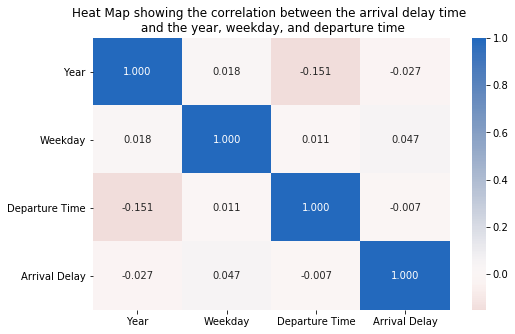

In [35]:
# creating a heat map to see the correlation between the numeric variables
plt.figure(figsize = [8, 5])
ax = sb.heatmap(df[NUMVARS].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
ax.set_xticklabels(['Year','Weekday','Departure Time', 'Arrival Delay'])
ax.set_yticklabels(['Year','Weekday','Departure Time', 'Arrival Delay'])
ax.set_title('Heat Map showing the correlation between the arrival delay time \n and the year, weekday, and departure time')
plt.show();

We can notice that there is a very small correlation between the delay and the day of week, year, and the departure time.

#### Let's find how the year and day of week affects the Delay time

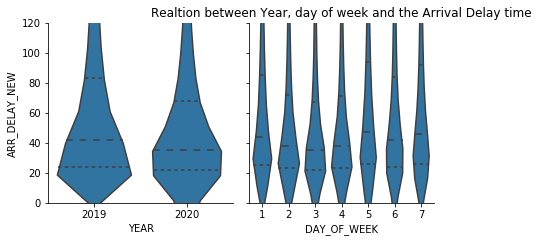

In [36]:
# Creating a violin plot showing the relation between the year, day of week and the delay time
g = sb.PairGrid(data = df, y_vars = ['ARR_DELAY_NEW'], x_vars = ['YEAR' , 'DAY_OF_WEEK'],
                height = 3)
plt.title('Realtion between Year, day of week and the Arrival Delay time')
plt.ylim(0, 120)
g.map(sb.violinplot, inner = 'quartile')
plt.show();

In 2020 the delay time was greater and more occurant than 2019. Regarding the day of the week, all the day have similar delay times and delay occurance, yet in the middle of the week delays occure more often.

#### Lets see what issue type did covid 19 produce.

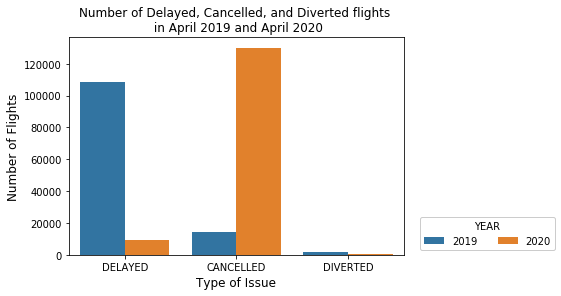

In [37]:
# Creating a Bar chart to see what issue type occured the most in 2019 and 2020
ax = sb.countplot(data = df, x = 'ISSUE_TYPE', hue = 'YEAR')
plt.title('Number of Delayed, Cancelled, and Diverted flights \n in April 2019 and April 2020')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'YEAR', bbox_to_anchor=(1, 0, 0.5, 0.8))
ax.set_ylabel('Number of Flights', fontsize = 12)
ax.set_xlabel('Type of Issue', fontsize = 12);

According to the bar graph above, due to covid 19, the number of cancelled flights increased drastically, while the number of delayed flights went down which is due to the number of cancelled flights.

## Multivariate Exploration

#### Below we'll find out how did the carriers handle the pandemic and how did the delay time change.

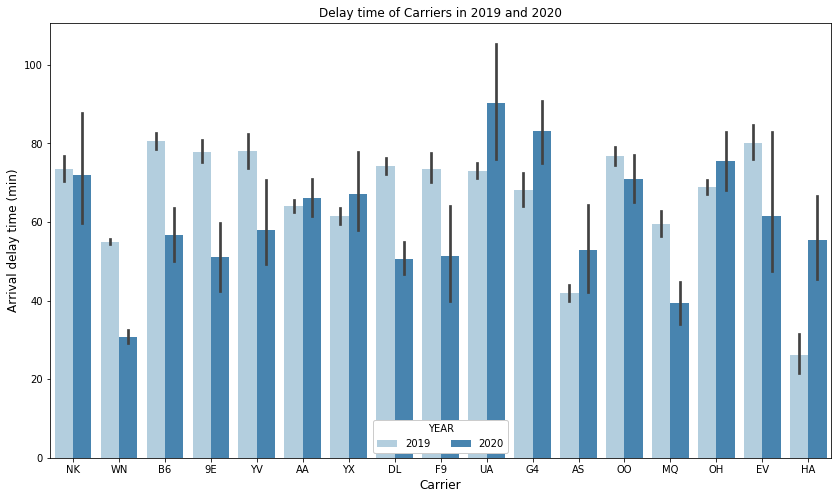

In [38]:
# Creating a barplot to see how the carrier's delay time changed between 2019 and 2020
plt.figure(figsize = [14, 8])
sb.barplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'DEP_DELAY_NEW', hue = 'YEAR', palette = 'Blues')
plt.title('Delay time of Carriers in 2019 and 2020')
plt.ylabel('Arrival delay time (min)', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.legend(loc = 8, ncol = 3, framealpha = 1, title = 'YEAR');


We can notice that most carriers improved their time management, though some didn't,yet most of them had a less delay time in 2020 than 2019

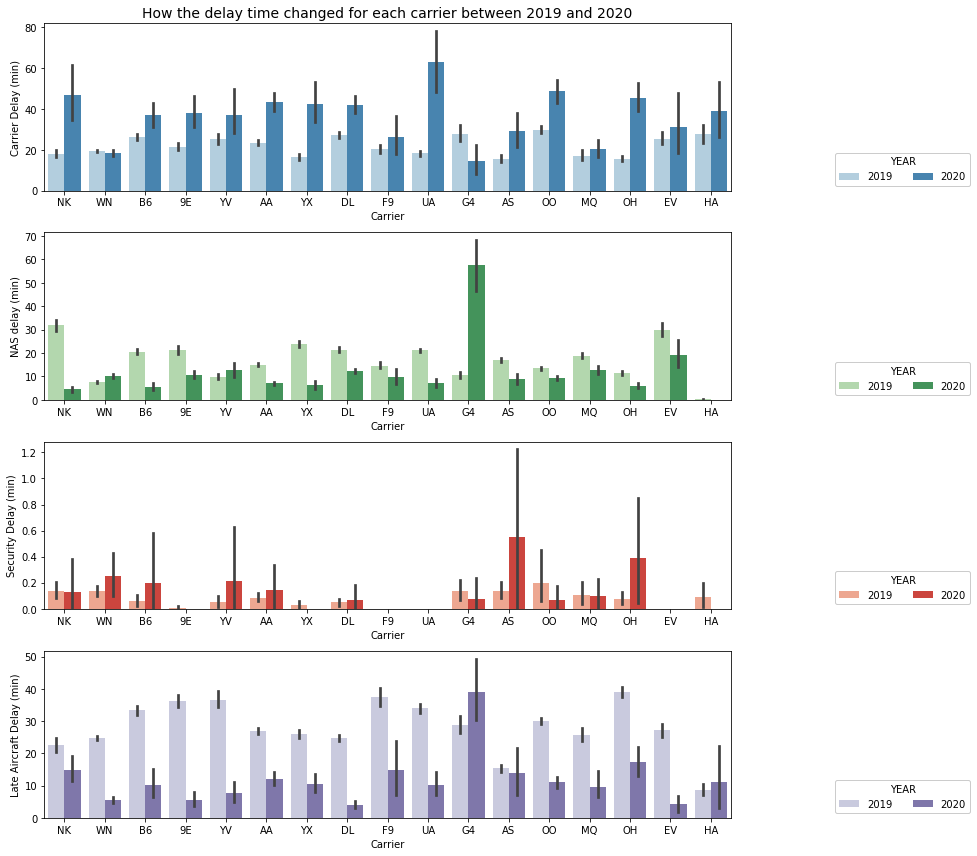

In [39]:
plt.figure(figsize = [14, 12])

plt.subplot(4, 1, 1)
ax = sb.barplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'CARRIER_DELAY', hue = 'YEAR', palette = 'Blues')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'YEAR',bbox_to_anchor=(1, 0, 0.5, 0.8))
ax.set_ylabel('Carrier Delay (min)')
ax.set_xlabel('Carrier')
plt.title('How the delay time changed for each carrier between 2019 and 2020', fontsize=14)

plt.subplot(4, 1, 2)
ax = sb.barplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'NAS_DELAY', hue = 'YEAR', palette = 'Greens')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'YEAR',bbox_to_anchor=(1, 0, 0.5, 0.8))
ax.set_ylabel('NAS delay (min)')
ax.set_xlabel('Carrier')

plt.subplot(4, 1, 3)
ax = sb.barplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'SECURITY_DELAY', hue = 'YEAR', palette = 'Reds')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'YEAR',bbox_to_anchor=(1, 0, 0.5, 0.8))
ax.set_ylabel('Security Delay (min)')
ax.set_xlabel('Carrier')

plt.subplot(4, 1, 4)
ax = sb.barplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'LATE_AIRCRAFT_DELAY', hue = 'YEAR', palette = 'Purples')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'YEAR', bbox_to_anchor=(1, 0, 0.5, 0.8))
ax.set_ylabel('Late Aircraft Delay (min)')
ax.set_xlabel('Carrier')
plt.tight_layout();

Comparing between 2019 and 2020, in overall the delay time for most of the carriers in 2019 was more than in 2020. Yet, the carrier delay time and security delay time was more in 2020 than 2019 this is probably due to all the procedures that should be taken due to the pandemic.

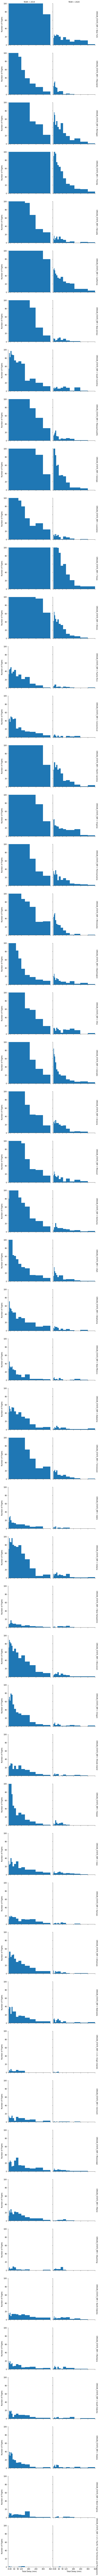

In [40]:
# Facet Grid showing the delay time in 2020 and 2019 in every state a flight takes off from
g = sb.FacetGrid(data = df, col = 'YEAR', row = 'ORIGIN_STATE_NM', height = 4,
                margin_titles = True)
bins = 10 ** np.arange(np.log10(15), np.log10(360)+0.1, 0.1)
g.map(plt.hist,'ARR_DELAY_NEW', bins=bins)
plt.xlim(10, 360)
plt.ylim(0,100)
g.set_xlabels('Total Delay (min)')
g.set_ylabels('Number of Flights')
tick_locs=[15,30,60,90,120,180,240,300,360]
plt.xticks(tick_locs)
plt.show();


From the above facit grid we can notice that in 2019 North Dakota had on average the largest amount of delay time followed by Mississippi, Kansas, and West Viginia. While Washington, Alaska, and Hawaii had on average the least amount of delay time.
However, in 2020 U.S. Pacific Trust Territories and Possessions was leading the list ahead of Vermont, Hawaii, and West Virgina.
This drastic change could be due to covid 19.

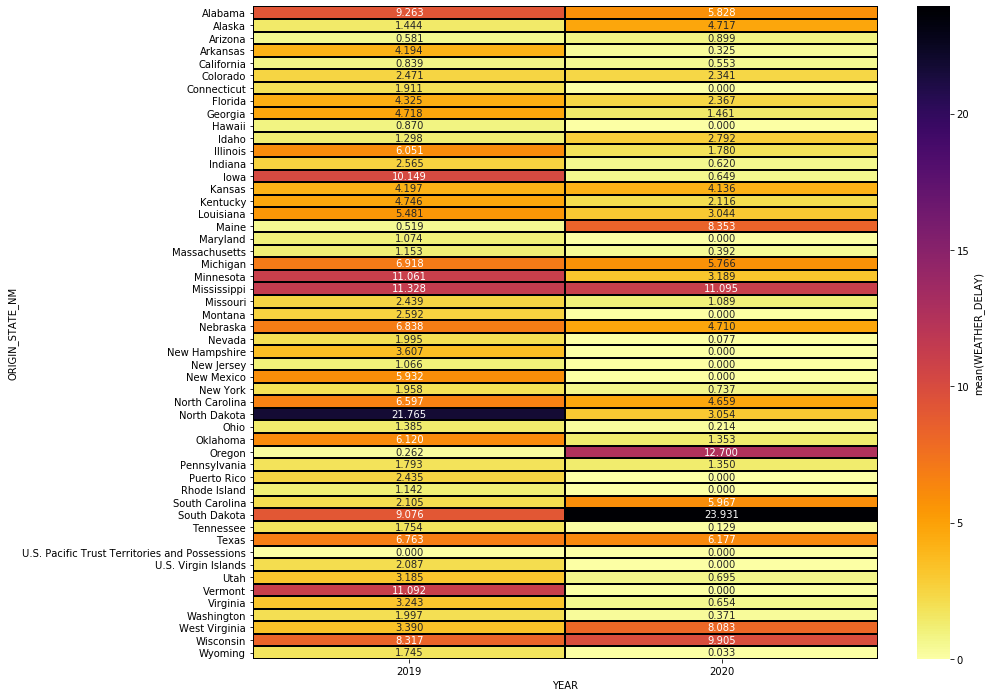

In [41]:
# Creating a heatmap showing the delay due to weather in every state for 2019 and 2020
plt.figure(figsize = [14, 12])
cat_means = df.groupby(['YEAR', 'ORIGIN_STATE_NM']).mean()['WEATHER_DELAY']
cat_means = cat_means.reset_index(name = 'WEATHER_DELAY')
cat_means = cat_means.pivot(index = 'ORIGIN_STATE_NM', columns = 'YEAR',
                            values = 'WEATHER_DELAY')
sb.heatmap(cat_means, annot = True, fmt = '.3f',cmap = 'inferno_r', linewidths = 1, linecolor = 'k',
           cbar_kws = {'label' : 'mean(WEATHER_DELAY)'});

Regarding the Delays due to weather conditions, in 2019 North Dakota was the most affected from weather conditions next was Mississippi and Vermont while Maine, Oregon , and U.S. Pacific Trust Territories and Possessions were the least affected. However, in 2020 South Dakota was the most affected followed by Oregon, and Mississippi. On the other hand, Maryland, Hawaii, and Connecticut were the least affected.